In [1]:
# Import the packages
# Read the data
# seperate cat and num columns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
visa_df=pd.read_csv(r'C:\Users\saikrishna\Documents\Narashit\python\database\pythonDatafiles\Visadataset.csv')
cat=visa_df.select_dtypes(include='object').columns
num=visa_df.select_dtypes(exclude='object').columns

In [3]:
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [ ]:
# consider two columns
# continent and case status
# we already know that continent column has total 6 lables are there
# case status has two lables denied and certified
# how many asia people got certified
# how many asia people got denied

In [19]:
# step-1: read the continent
# step-2: read the case status
# step-3: con1= content == 'asia'
# step-4: con2 : case status='certified'
# step-5: con3=con1 and con2
# step-6: len(visadf[con3])

con1=visa_df['continent']=='Asia'
con2=visa_df['case_status']=='Certified'
con3=con1&con2
len(visa_df[con3])

11012

In [23]:
lables=visa_df['continent'].unique()
for i in lables:
    con1=visa_df['continent']==i
    con2=visa_df['case_status']=='Certified'
    con3=con1&con2
    count=len(visa_df[con3])
    print(f"The number of certified applicants from {i} is: {count}")

The number of certified applicants from Asia is: 11012
The number of certified applicants from Africa is: 397
The number of certified applicants from North America is: 2037
The number of certified applicants from Europe is: 2957
The number of certified applicants from South America is: 493
The number of certified applicants from Oceania is: 122


In [25]:
lables=visa_df['continent'].unique()
certified,denied=[],[]
for i in lables:
    con1=visa_df['continent']==i
    con2=visa_df['case_status']=='Certified'
    con3=visa_df['case_status']=='Denied'
    certi_con=con1&con2
    den_con=con1&con3
    certified.append(len(visa_df[certi_con]))
    denied.append(len(visa_df[den_con]))
certified,denied

([11012, 397, 2037, 2957, 493, 122], [5849, 154, 1255, 775, 359, 70])

In [27]:
pd.DataFrame(zip(certified,denied),
index=lables,
columns=['Certifed','Denied'])

,Certifed,Denied
Asia,11012,5849
Africa,397,154
North America,2037,1255
Europe,2957,775
South America,493,359
Oceania,122,70


**crosstab**

In [29]:
col1=visa_df['continent']
col2=visa_df['case_status']
pd.crosstab(col1,col2)

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


In [6]:
#pd.crosstab()
col1=visa_df['continent']
col2=visa_df['case_status']
pd.crosstab(col2,col1)

continent,Africa,Asia,Europe,North America,Oceania,South America
case_status,,,,,,
Certified,397,11012,2957,2037,122,493
Denied,154,5849,775,1255,70,359


In [12]:
col1=visa_df['continent']
col2=visa_df['case_status']
r1=pd.crosstab(col1,col2)
r2=pd.crosstab(col2,col1)

<Axes: xlabel='continent'>

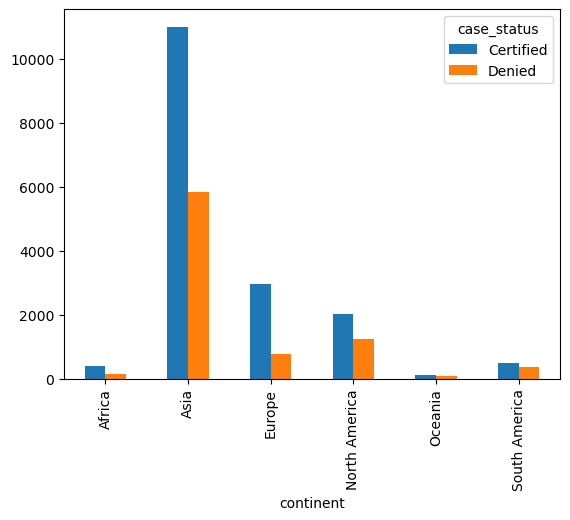

In [14]:
r1.plot(kind='bar')

<Axes: xlabel='case_status'>

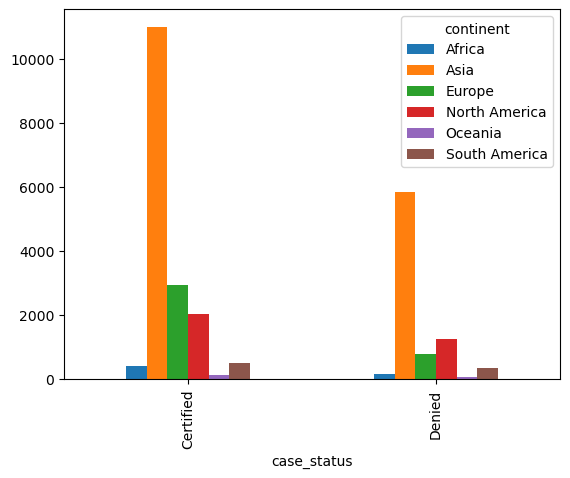

In [16]:
r2.plot(kind='bar')

**Multivariate**
- continet
- education_of_employee
- case_status
- the user should fix which column represent as index
- then other two columns keep in list, and pass in column argument

In [24]:
col1=visa_df['continent']
col2=visa_df['education_of_employee']
col3=visa_df['case_status']
r1=pd.crosstab(col1,[col2,col3])
r1

education_of_employee Bachelor's        Doctorate        High School         \
case_status            Certified Denied Certified Denied   Certified Denied   
continent                                                                     
Africa                        81     62        43     11          23     43   
Asia                        4407   2761       780    143         676   1614   
Europe                      1040    259       788     58         162    328   
North America                641    584       207     51         210    191   
Oceania                       38     28        19      3          19     17   
South America                160    173        75     14          74     63   

education_of_employee  Master's         
case_status           Certified Denied  
continent                               
Africa                      250     38  
Asia                       5149   1331  
Europe                      967    130  
North America               979    429  
Oceania                      46     22  
South America               184    109

In [26]:
col1=visa_df['continent']
col2=visa_df['education_of_employee']
col3=visa_df['case_status']
r2=pd.crosstab(col2,[col1,col3])
r2

continent                Africa             Asia           Europe         \
case_status           Certified Denied Certified Denied Certified Denied   
education_of_employee                                                      
Bachelor's                   81     62      4407   2761      1040    259   
Doctorate                    43     11       780    143       788     58   
High School                  23     43       676   1614       162    328   
Master's                    250     38      5149   1331       967    130   

continent             North America          Oceania        South America  \
case_status               Certified Denied Certified Denied     Certified   
education_of_employee                                                       
Bachelor's                      641    584        38     28           160   
Doctorate                       207     51        19      3            75   
High School                     210    191        19     17            74   
Master's                        979    429        46     22           184   

continent                     
case_status           Denied  
education_of_employee         
Bachelor's               173  
Doctorate                 14  
High School               63  
Master's                 109

In [28]:
col1=visa_df['continent']
col2=visa_df['education_of_employee']
col3=visa_df['case_status']
r3=pd.crosstab(col3,[col1,col2])
r3

continent                 Africa                                      Asia  \
education_of_employee Bachelor's Doctorate High School Master's Bachelor's   
case_status                                                                  
Certified                     81        43          23      250       4407   
Denied                        62        11          43       38       2761   

continent                                                Europe            \
education_of_employee Doctorate High School Master's Bachelor's Doctorate   
case_status                                                                 
Certified                   780         676     5149       1040       788   
Denied                      143        1614     1331        259        58   

continent              ... North America             Oceania            \
education_of_employee  ...   High School Master's Bachelor's Doctorate   
case_status            ...                                               
Certified              ...           210      979         38        19   
Denied                 ...           191      429         28         3   

continent                                  South America            \
education_of_employee High School Master's    Bachelor's Doctorate   
case_status                                                          
Certified                      19       46           160        75   
Denied                         17       22           173        14   

continent                                   
education_of_employee High School Master's  
case_status                                 
Certified                      74      184  
Denied                         63      109  

[2 rows x 24 columns]

<Axes: xlabel='continent'>

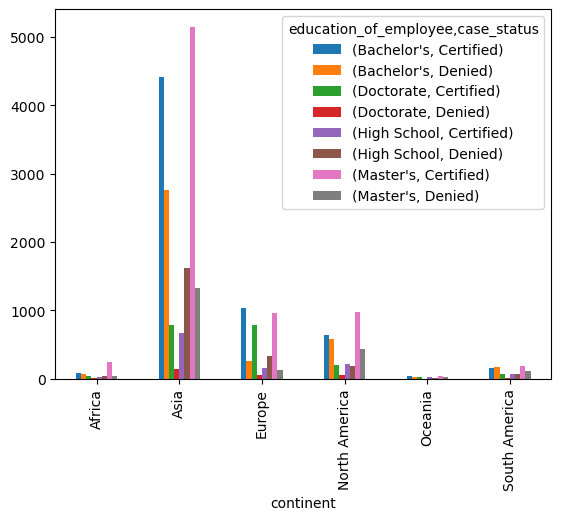

In [30]:
r1.plot(kind='bar')

**Numerical-Numerical**
- scatter plots are used to plot between two numerical columns
- it is under **matplotlib**
- it is represent as plt.scatter()
- scatter plots gives the relation between twoo variables
   - postive related
   - negative related
   - no relation 

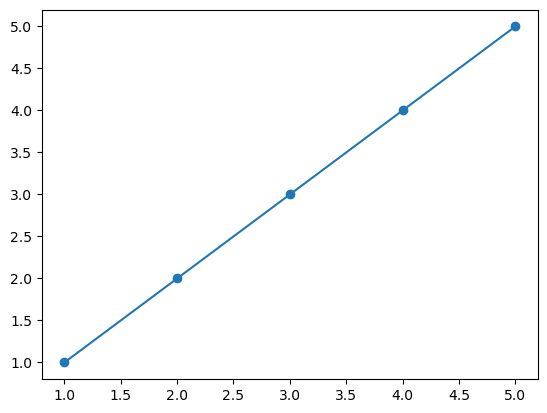

In [29]:
x=[1,2,3,4,5]
y=[1,2,3,4,5]
plt.scatter(x,y)
plt.plot(x,y)

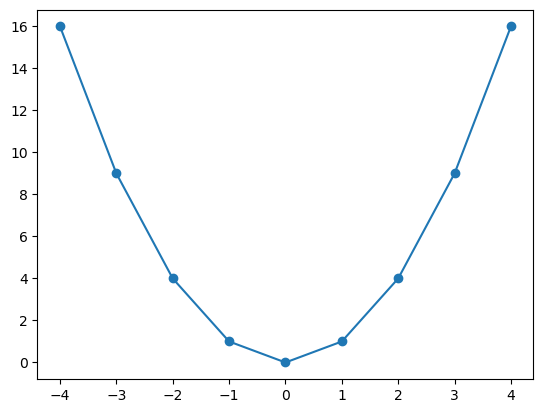

In [33]:
x=[i for i in range(-4,5)]
y=[i*i for i in range(-4,5)]
plt.scatter(x,y)
plt.plot(x,y)

In [43]:
num

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

In [32]:
col1=visa_df['no_of_employees']
col2=visa_df['yr_of_estab']
col3=visa_df['prevailing_wage']

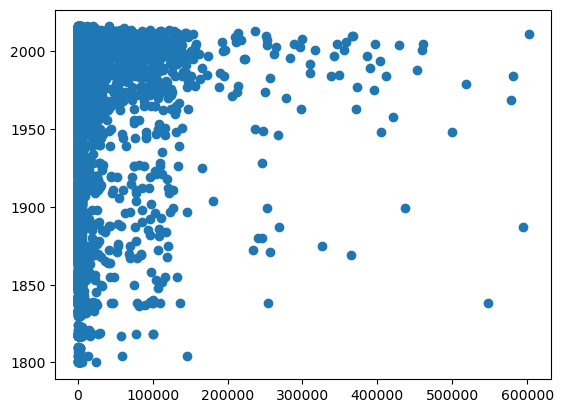

In [34]:
plt.scatter(col1,col2)

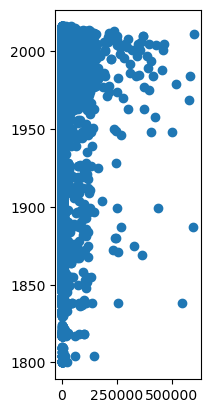

In [37]:
plt.subplot(1,3,1).scatter(visa_df['no_of_employees'],visa_df['yr_of_estab'])

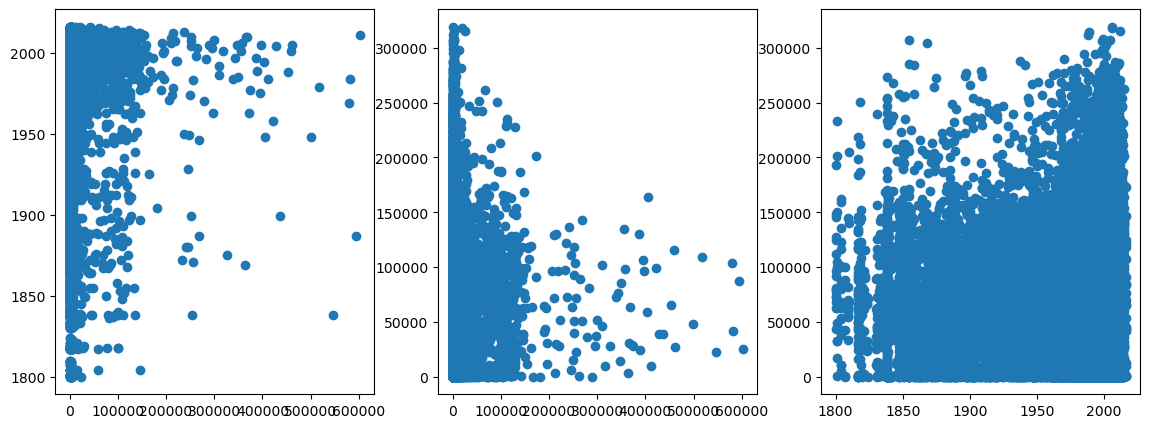

In [36]:
plt.figure(figsize=(14,5))
plt.subplot(1,3,1).scatter(col1,col2)
plt.subplot(1,3,2).scatter(col1,col3)
plt.subplot(1,3,3).scatter(col2,col3)

**correlation**

In [48]:
visa_df.corr(numeric_only=True)

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


**Heatmap**

<Axes: >

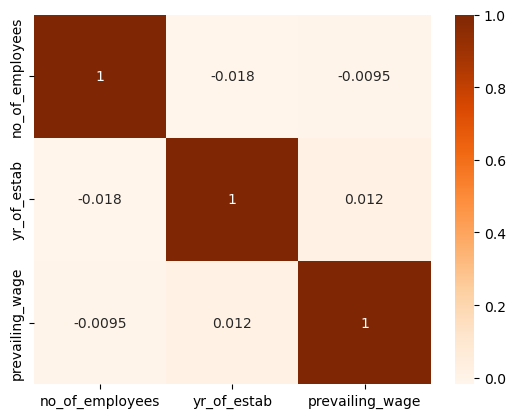

In [85]:
corr=visa_df.corr(numeric_only=True)
sns.heatmap(corr,annot=True,
           cmap='Oranges')